# Contour a seismic horizon

This notebook accompanies [a post on the Agile Scientific blog](https://agilescientific.com/blog/2017/12/29/x-lines-of-python-contour-maps).

A few weeks ago I wrote a post about colourmaps. In the notebook for the post, I made a lot of maps. I mostly glossed over how to make contour maps, so I thought I'd dig a little more into it in this notebook.

We'll use the [Penobscot / Sable Island 2D seismic data](https://www.opendtect.org/osr/Main/PENOBSCOT3DSABLEISLAND) from offshore Nova Scotia, made available by the **Nova Scotia Department of Energy** and **dGB Earth Sciences**.

First, the usual preliminaries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the horizon

In [3]:
seabed = np.load('../data/Penobscot_Seabed.npy')

We'll start by computing -1 &times; `seabed`, to make an elevation map. This isn't strictly sensible for a TWT map, but it's a quick way to get the colourbar the right way up for the rest of the post.

In [4]:
seabed *= -1  # Equivalent to seabed = seabed * -1

Arguably the easiest way to visualize a 2D array is to make a raster of it, colouring the pizels using a table I'll call a colourmap. 

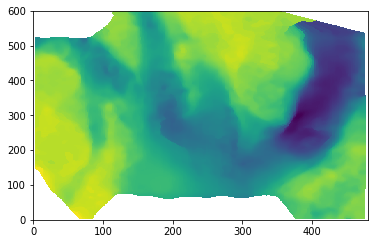

In [5]:
plt.imshow(seabed, aspect=0.5, origin='lower')

If you get a nasty rainbow colourmap when you run this command, you should upgrade to Matplotlib v2.0+. Meanwhile, just pass `cmap='viridis'` to `imshow()` and you can get by for now.

We can make a nicer plot too.

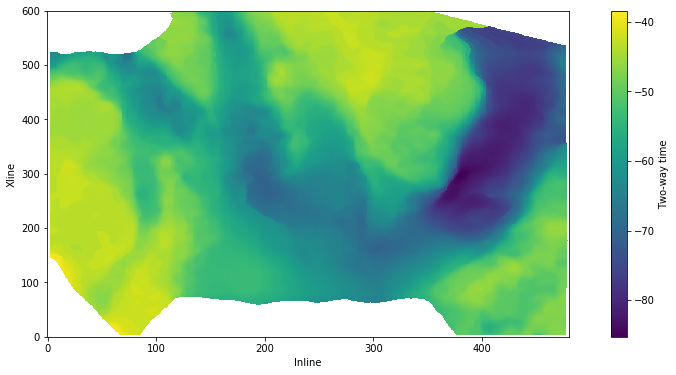

In [6]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
plt.imshow(seabed, aspect=0.5, origin='lower')
plt.colorbar(label="Two-way time")
ax.set_xlabel("Inline")
ax.set_ylabel("Xline")
plt.show()

A quick aside: I wrote a post recently about how your choice of colourmap can affect what you can see in a visualization like this. It's easy to experiment with different colourmaps in matplotlib, posting the results side-by-side for easy comparison.

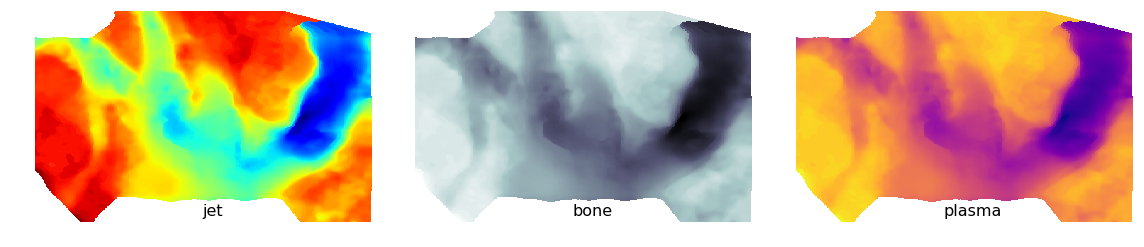

In [7]:
fig = plt.figure(figsize=(16, 4))

cmaps = ['jet', 'bone', 'plasma']
for i, cmap in enumerate(cmaps):
    ax = fig.add_subplot(1, 3, i+1)
    plt.imshow(seabed, aspect=0.5, cmap=cmap, origin='lower')
    ax.axis('off')
    ax.text(253, 22, cmap, ha='center', size=16, color='black')

plt.tight_layout()
plt.show()

## Add contours

Drawing a contour map is quite straghtforward:

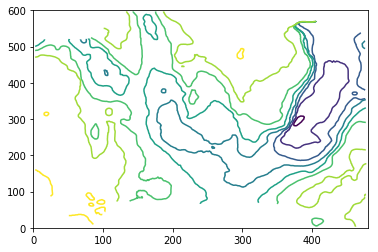

In [8]:
plt.contour(seabed)

Most of the time, you'll want to control the appearance of these contours. For a start, let's draw more of them. To do this, we'll compute the minimum `mi` and maximum `ma` values of the surface, then make an `arange` from the minimum to the maximum.

In [9]:
mi, ma = np.floor(np.nanmin(seabed)), np.ceil(np.nanmax(seabed))
levels = np.arange(mi, ma+2, 2)  # Add to `ma` to include it explicitly.

Now `levels` is just an array of the levels at which we want contours:

In [10]:
levels

array([-86., -84., -82., -80., -78., -76., -74., -72., -70., -68., -66.,
       -64., -62., -60., -58., -56., -54., -52., -50., -48., -46., -44.,
       -42., -40., -38.])

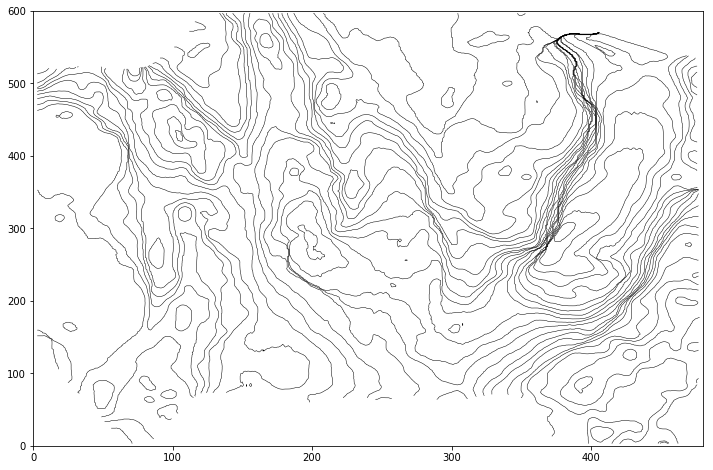

In [11]:
plt.figure(figsize=(12, 8))
plt.contour(seabed, levels=levels, linewidths=0.5, linestyles='solid', colors=['black'])

## Filled contours

For filled contours, we use another command, `contourf`:

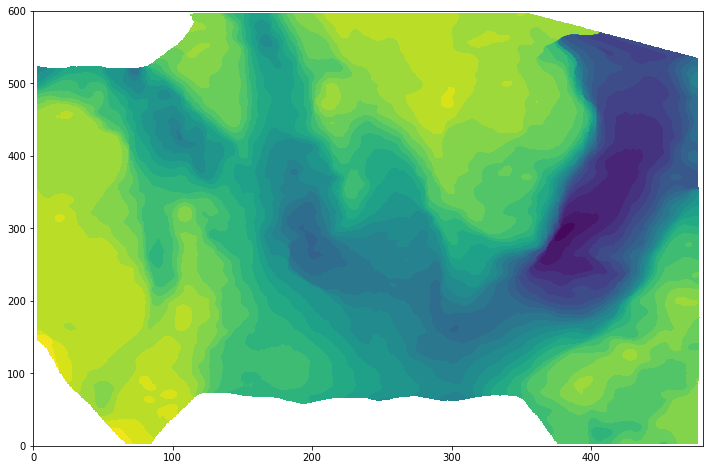

In [12]:
plt.figure(figsize=(12, 8))
plt.contourf(seabed, levels=levels)

Unlike in MATLAB, this command does not plot the contours as well. To get both, we simply make two plots. I like to use black for contours, with a low opacity or `alpha` (i.e. mostly transparent).

Let's also add the `colorbar`:

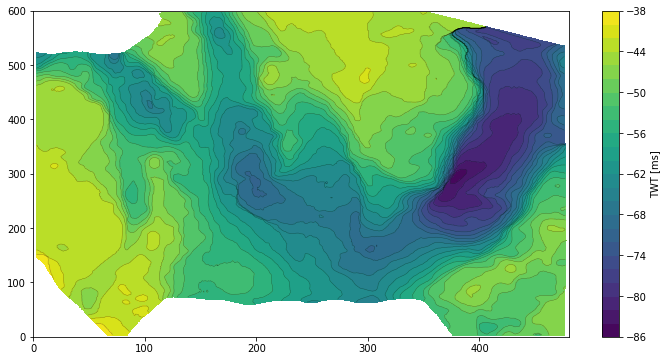

In [13]:
plt.figure(figsize=(12, 6))
plt.contour(seabed, levels=levels, linewidths=0.5, linestyles='solid', colors=['black'], alpha=0.4)
plt.contourf(seabed, levels=levels)
plt.colorbar(label="TWT [ms]")

## Labeling contours

Note that some of the arguments for these plotting commands can take different types, depending on what we want to achieve. For example, I'm using a single linewidth of `0.5`, but if we want index contours, we can specify a tuple of linewidths (I'll redefine `levels` as well, to make this easier):

In [14]:
step = 2
levels = np.arange(10*(mi//10), ma+step, step)  # Add to `ma` to include it explicitly.

In [15]:
lws = [0.5 if l%10 else 1 for l in levels]

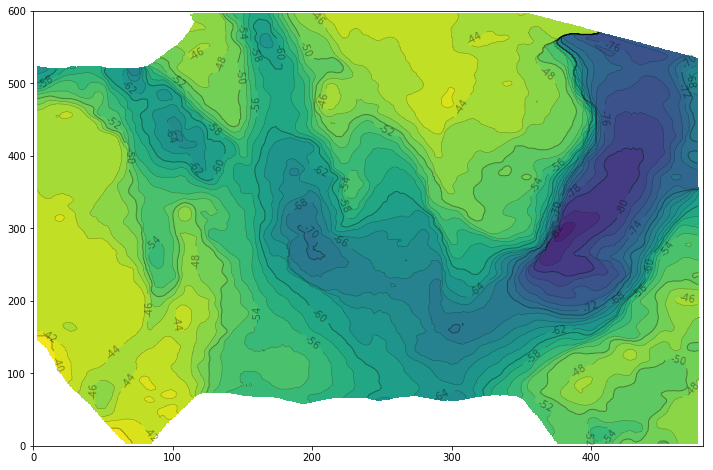

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
ax.contourf(seabed, levels=levels)
params = dict(linestyles='solid', colors=['black'], alpha=0.4)
cs = ax.contour(seabed, levels=levels, linewidths=lws, **params)
ax.clabel(cs, fmt='%d')
plt.show()

Notice that I switched to a slightly different pattern of `matplotlib` calls to do this plot. It's more verbose, but sometimes you need to be able to control things more finely. In fact, it's not a bad idea to make all your plots like this, if you're reasonably fast at typing.

## Publication-ready plot

Let's make a final plot, adding some annotation. We'll go back to using `imshow` for the raster — I prefer the subtlety of the smooth colour ramp. And let's switch to a more naturalistic colourmap, given that this is a bathymetric surface. 

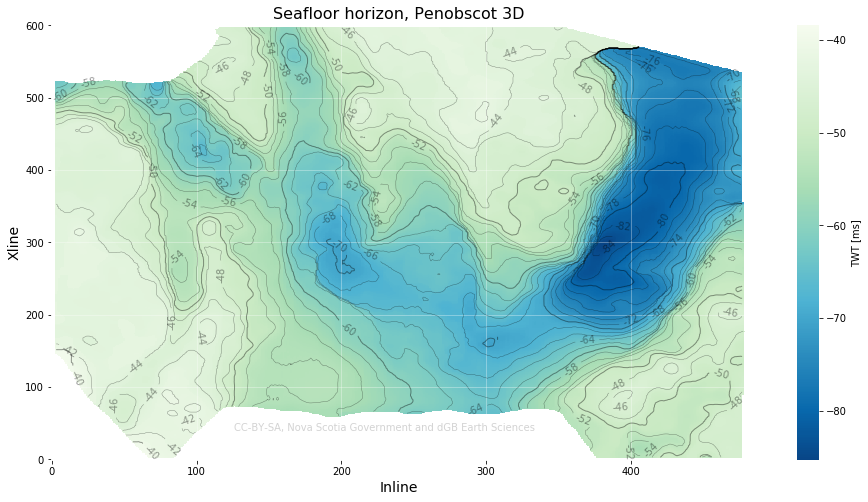

In [17]:
# Set up the figure.
fig = plt.figure(figsize=(18,8), facecolor='white')
ax = fig.add_subplot(111)
ax.set_title("Seafloor horizon, Penobscot 3D", size=16)

# Plot the raster and colourbar.
im = ax.imshow(seabed, cmap='GnBu_r', aspect=0.5, origin='lower')
ax.set_xlabel("Inline", size=14); ax.set_ylabel("Xline", size=14)
cb = plt.colorbar(im, label="TWT [ms]")
cb.set_clim(mi, ma)
cb.outline.set_visible(False)

# Plot the contours.
cs = ax.contour(seabed, levels=levels, linewidths=lws, linestyles='solid', colors=[(0,0,0,0.4)])
ax.clabel(cs, fmt='%d', size=6)

# Finish up.
text = "CC-BY-SA, Nova Scotia Government and dGB Earth Sciences"
ax.text(230, 40, text, ha='center', color='lightgray')
ax.grid(color='w', alpha=0.4)
plt.setp([ax.spines.values()], color='w')
plt.show()

<hr />

© 2017 Agile Scientific, licensed CC-BY-SA